In [1]:
import pandas as pd
import os
import gc
import warnings
import matplotlib
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE, ADASYN
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from lightgbm import LGBMRegressor
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import auc

%matplotlib inline


In [2]:
train = pd.read_csv('E:\Jupyter-work/train.csv',encoding='gb18030')
test = pd.read_csv('E:\Jupyter-work/test.csv',encoding='gb18030')
pd.set_option('display.max_columns', None)    # 显示所有列
train.head(10)

,CUST_ID,OPEN_ORG_NUM,IDF_TYP_CD,GENDER,bad_good,LAST_OPEN_TENURE_DAYS,G_OS_PRCP_SUM,OS_PRCP_SUM_THREE,OS_PRCP_SUM_SIX,guozhai_flag,L3_DR_AMT,L3_DR_CNT,DR_AMT,DR_CNT,L3_CR_AMT,L3_CR_CNT,CR_AMT,CR_CNT,CUST_ACCOUNT_CNT,CUST_PRODUCT_CNT,CUST_SAVING_AMT,CUST_FINA_AMT,CUST_PRIFINA_AMT,CUST_FOND_AMT,CUST_NADEBT_AMT,CUST_YBT_AMT,CUST_METAL_AMT,CUST_AUM,CUST_EUP_ACCT_FLAG,CUST_AU_ACCT_FLAG,CUST_SALARY_FINANCIAL_FLAG,CUST_SOCIAL_SECURITYIC_FLAG,CUST_MTFLOW_FLAG,CUST_DOLLER_FLAG,CUST_INTERNATIONAL_GOLD_FLAG,CUST_INTERNATIONAL_COMMON_FLAG,CUST_INTERNATIONAL_SIL_FLAG,CUST_INTERNATIONAL_DIAMOND_FLAG,CUST_GOLD_COMMON_FLAG,CUST_STAD_PLATINUM_FLAG,CUST_LUXURY_PLATINUM_FLAG,CUST_PLATINUM_FINANCIAL_FLAG,CUST_DIAMOND_FLAG,CUST_INFINIT_FLAG,CUST_BUSINESS_FLAG,CUST_ASSET_AMT,CUST_DEBT_AMT,CUST_TENURE_MONTHS,CUST_ACCOUNT_OPEN_CNT,CUST_ACCOUNT_LOST_CNT,L3_CUST_AVG_AUM,L6_CUST_AVG_AUM,L3_CUST_SAVING_AVGAMT,L6_CUST_SAVING_AVGAMT,L3_CUST_FINA_AVGAMT,L6_CUST_FINA_AVGAMT,L3_CUST_PRIFINA_AVGAMT,L6_CUST_PRIFINA_AVGAMT,L3_CUST_FOND_AVGAMT,L6_CUST_FOND_AVGAMT,L3_CUST_NADEBT_AVGAMT,L6_CUST_NADEBT_AVGAMT,L3_CUST_YBT_AVGAMT,L6_CUST_YBT_AVGAMT,L3_CUST_METAL_AVGAMT,L6_CUST_METAL_AVGAMT,L3_CUST_PRIDEPT_AVGAMT,L6_CUST_PRIDEPT_AVGAMT,L3_CUST_ASSET_AVG_AMT,L6_CUST_ASSET_AVG_AMT,L3_CUST_DEBT_AVG_AMT,L6_CUST_DEBT_AVG_AMT,CUST_SAME_IN_AMT,CUST_DIFF_IN_AMT,CUST_SAME_OUT_AMT,CUST_DIFF_OUT_AMT,CUST_SAME_IN_CNT,CUST_DIFF_IN_CNT,CUST_SAME_OUT_CNT,CUST_DIFF_OUT_CNT,L3_CUST_SAME_IN_AMT,L3_CUST_DIFF_IN_AMT,L3_CUST_SAME_OUT_AMT,L3_CUST_DIFF_OUT_AMT,L3_CUST_SAME_IN_CNT,L3_CUST_DIFF_IN_CNT,L3_CUST_SAME_OUT_CNT,L3_CUST_DIFF_OUT_CNT,L6_CUST_SAME_IN_AMT,L6_CUST_DIFF_IN_AMT,L6_CUST_SAME_OUT_AMT,L6_CUST_DIFF_OUT_AMT,L6_CUST_SAME_IN_CNT,L6_CUST_DIFF_IN_CNT,L6_CUST_SAME_OUT_CNT,L6_CUST_DIFF_OUT_CNT,DEP_SA_FLAG,DEP_SA_OPEN_TENURE_DAYS,DEP_SA_LAST_TENURE_DAYS,DEP_SA_AVG_TENURE_DAYS,DEP_SA_SUMACCOUNT_CNT,L3_DEP_SA_AVG_ACCOUNT_CNT,L6_DEP_SA_AVG_ACCOUNT_CNT,DEP_SA_NEW_ACCOUNT_CNT,L3_DEP_SA_NEW_ACCOUNT_CNT,L6_DEP_SA_NEW_ACCOUNT_CNT,DEP_SA_FGCR_ACCOUNT_CNT,DEP_SA_ACCOUNT_CNT,DEP_SA_FGCR_BAL,L3_DEP_SA_FGCR_BAL,L6_DEP_SA_FGCR_BAL,DEP_SA_BAL,L3_DEP_SA_BAL,L6_DEP_SA_BAL,DEP_SA_NEW_BAL,L3_DEP_SA_NEW_AVG_BAL,L6_DEP_SA_NEW_AVG_BAL,DEP_SA_FGCR_NEW_BAL,L3_DEP_SA_FGCR_NEW_AVG_BAL,L6_DEP_SA_FGCR_NEW_AVG_BAL,DEP_SA_TRSP_DEP_AMT,DEP_SA_TRSP_WITD_AMT,DEP_SA_FGCR_TRSP_DEP_AMT,DEP_SA_FGCR_TRSP_WITD_AMT,DEP_SA_FIXTCUR_AMT,DEP_SA_FGCR_FIXTCUR_AMT,DEP_SA_DAY_MAX_IN_AMT,DEP_SA_MOTH_MAX_IN_AMT,DEP_SA_DAY_MAX_OUT_AMT,DEP_SA_MOTH_MAX_OUT_AMT,DEP_SA_FGCR_DAY_MAX_IN_AMT,DEP_SA_FGCR_MOTH_MAX_IN_AMT,DEP_SA_FGCR_DAY_MAX_OUT_AMT,DEP_SA_FGCR_MOTH_MAX_OUT_AMT,L3DEP_SA_DAY_MAX_IN_AMT,L3DEP_SA_MOTH_MAX_IN_AMT,L3DEP_SA_DAY_MAX_OUT_AMT,L3DEP_SA_MOTH_MAX_OUT_AMT,L6DEP_SA_DAY_MAX_IN_AMT,L6DEP_SA_MOTH_MAX_IN_AMT,L6DEP_SA_DAY_MAX_OUT_AMT,L6DEP_SA_MOTH_MAX_OUT_AMT,L3DEP_SA_FGCR_DAY_MAX_IN_AMT,L3DEP_SA_FGCR_MOTH_MAX_IN_AMT,L3DEP_SA_FGCR_DAY_MAX_OUT_AMT,L3DEP_SA_FGCR_MOTH_MAX_OUT_AMT,L6DEP_SA_FGCR_DAY_MAX_IN_AMT,L6DEP_SA_FGCR_MOTH_MAX_IN_AMT,L6DEP_SA_FGCR_DAY_MAX_OUT_AMT,L6DEP_SA_FGCR_MOTH_MAX_OUT_AMT,DEP_SA_DEPCD_COSM_AMT,DEP_SA_DEPCD_COSM_CNT,L3DEP_SA_DEPCD_COSM_AVG_AMT,L3DEP_SA_DEPCD_COSM_AVG_CNT,L6DEP_SA_DEPCD_COSM_AVG_AMT,L6DEP_SA_DEPCD_COSM_AVG_CNT,DEP_SA_DEBIT_AMT,DEP_SA_DEBIT_CNT,DEP_SA_CREDIT_AMT,DEP_SA_CREDIT_CNT,L3DEP_SA_DEBIT_AMT,L3DEP_SA_DEBIT_CNT,L3DEP_SA_CREDIT_AMT,L3DEP_SA_CREDIT_CNT,L6DEP_SA_DEBIT_AMT,L6DEP_SA_DEBIT_CNT,L6DEP_SA_CREDIT_AMT,L6DEP_SA_CREDIT_CNT,DEP_SA_DAYAVG_BAL,L3_DEP_SA_DAYAVG_BAL,L6_DEP_SA_DAYAVG_BAL,DEP_TD_FLAG,LOAN_FLAG,FUND_FLAG,C_FUND_FLAG,D_FUND_FLAG,S_FUND_FLAG,BOND_FLAG,CER_BOND_FLAG,BK_BOND_FLAG,CRED_FLAG,RELATED_REPAY_FLAG,TOT_REPAY_FLAG,L3_DEP_CARD_CUST_AMT,L3_DEP_CARD_CUST_CNT,L3_DEP_CARD_CASH_AMT,L3_DEP_CARD_CASH_CNT,L6_DEP_CARD_CUST_AMT,L6_DEP_CARD_CUST_CNT,L6_DEP_CARD_CASH_AMT,L6_DEP_CARD_CASH_CNT,DEP_CARD_CASH_CNT,DEP_CARD_CUST_CNT,DEP_CARD_CASH_AMT,DEP_CARD_CUST_AMT,CHANNEL_CTR_FUND_AMT,CHANNEL_CTR_FUND_CNT,CHANNEL_CTR_FINANCIAL_AMT,CHANNEL_CTR_FINANCIAL_CNT,CHANNEL_CTR_INSURE_AMT,CHAN

In [3]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE, ADASYN
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
# 目标值
target = train.pop('bad_good')
# 开户机构号
open_org_num = train.pop('OPEN_ORG_NUM')

# 构建类别特征字段名称
# 类别特征
cate_cols = train.dtypes[train.dtypes==object].index.tolist()
num_cols = [col for col in train.columns.tolist() if col not in cate_cols + ['CUST_ID']]
category = train[cate_cols]
numberic = train[num_cols]

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 285285 entries, 0 to 285284
Columns: 625 entries, CUST_ID to L6_CHANNEL_TXN_DOUTTA_AVGCNT
dtypes: float64(399), int64(194), object(32)
memory usage: 1.3+ GB


In [5]:
scaler = MinMaxScaler()
numberic = pd.DataFrame(scaler.fit_transform(numberic), columns=numberic.columns)
numberic.head()

,LAST_OPEN_TENURE_DAYS,G_OS_PRCP_SUM,OS_PRCP_SUM_THREE,OS_PRCP_SUM_SIX,guozhai_flag,L3_DR_AMT,L3_DR_CNT,DR_AMT,DR_CNT,L3_CR_AMT,L3_CR_CNT,CR_AMT,CR_CNT,CUST_ACCOUNT_CNT,CUST_PRODUCT_CNT,CUST_SAVING_AMT,CUST_FINA_AMT,CUST_PRIFINA_AMT,CUST_FOND_AMT,CUST_NADEBT_AMT,CUST_YBT_AMT,CUST_METAL_AMT,CUST_AUM,CUST_ASSET_AMT,CUST_DEBT_AMT,CUST_TENURE_MONTHS,CUST_ACCOUNT_OPEN_CNT,CUST_ACCOUNT_LOST_CNT,L3_CUST_AVG_AUM,L6_CUST_AVG_AUM,L3_CUST_SAVING_AVGAMT,L6_CUST_SAVING_AVGAMT,L3_CUST_FINA_AVGAMT,L6_CUST_FINA_AVGAMT,L3_CUST_PRIFINA_AVGAMT,L6_CUST_PRIFINA_AVGAMT,L3_CUST_FOND_AVGAMT,L6_CUST_FOND_AVGAMT,L3_CUST_NADEBT_AVGAMT,L6_CUST_NADEBT_AVGAMT,L3_CUST_YBT_AVGAMT,L6_CUST_YBT_AVGAMT,L3_CUST_METAL_AVGAMT,L6_CUST_METAL_AVGAMT,L3_CUST_PRIDEPT_AVGAMT,L6_CUST_PRIDEPT_AVGAMT,L3_CUST_ASSET_AVG_AMT,L6_CUST_ASSET_AVG_AMT,L3_CUST_DEBT_AVG_AMT,L6_CUST_DEBT_AVG_AMT,CUST_SAME_IN_AMT,CUST_DIFF_IN_AMT,CUST_SAME_OUT_AMT,CUST_DIFF_OUT_AMT,CUST_SAME_IN_CNT,CUST_DIFF_IN_CNT,CUST_SAME_OUT_CNT,CUST_DIFF_OUT_CNT,L3_CUST_SAME_IN_AMT,L3_CUST_DIFF_IN_AMT,L3_CUST_SAME_OUT_AMT,L3_CUST_DIFF_OUT_AMT,L3_CUST_SAME_IN_CNT,L3_CUST_DIFF_IN_CNT,L3_CUST_SAME_OUT_CNT,L3_CUST_DIFF_OUT_CNT,L6_CUST_SAME_IN_AMT,L6_CUST_DIFF_IN_AMT,L6_CUST_SAME_OUT_AMT,L6_CUST_DIFF_OUT_AMT,L6_CUST_SAME_IN_CNT,L6_CUST_DIFF_IN_CNT,L6_CUST_SAME_OUT_CNT,L6_CUST_DIFF_OUT_CNT,DEP_SA_OPEN_TENURE_DAYS,DEP_SA_LAST_TENURE_DAYS,DEP_SA_AVG_TENURE_DAYS,DEP_SA_SUMACCOUNT_CNT,L3_DEP_SA_AVG_ACCOUNT_CNT,L6_DEP_SA_AVG_ACCOUNT_CNT,DEP_SA_NEW_ACCOUNT_CNT,L3_DEP_SA_NEW_ACCOUNT_CNT,L6_DEP_SA_NEW_ACCOUNT_CNT,DEP_SA_FGCR_ACCOUNT_CNT,DEP_SA_ACCOUNT_CNT,DEP_SA_FGCR_BAL,L3_DEP_SA_FGCR_BAL,L6_DEP_SA_FGCR_BAL,DEP_SA_BAL,L3_DEP_SA_BAL,L6_DEP_SA_BAL,DEP_SA_NEW_BAL,L3_DEP_SA_NEW_AVG_BAL,L6_DEP_SA_NEW_AVG_BAL,DEP_SA_FGCR_NEW_BAL,L3_DEP_SA_FGCR_NEW_AVG_BAL,L6_DEP_SA_FGCR_NEW_AVG_BAL,DEP_SA_TRSP_DEP_AMT,DEP_SA_TRSP_WITD_AMT,DEP_SA_FGCR_TRSP_DEP_AMT,DEP_SA_FGCR_TRSP_WITD_AMT,DEP_SA_FIXTCUR_AMT,DEP_SA_FGCR_FIXTCUR_AMT,DEP_SA_DAY_MAX_IN_AMT,DEP_SA_MOTH_MAX_IN_AMT,DEP_SA_DAY_MAX_OUT_AMT,DEP_SA_MOTH_MAX_OUT_AMT,DEP_SA_FGCR_DAY_MAX_IN_AMT,DEP_SA_FGCR_MOTH_MAX_IN_AMT,DEP_SA_FGCR_DAY_MAX_OUT_AMT,DEP_SA_FGCR_MOTH_MAX_OUT_AMT,L3DEP_SA_DAY_MAX_IN_AMT,L3DEP_SA_MOTH_MAX_IN_AMT,L3DEP_SA_DAY_MAX_OUT_AMT,L3DEP_SA_MOTH_MAX_OUT_AMT,L6DEP_SA_DAY_MAX_IN_AMT,L6DEP_SA_MOTH_MAX_IN_AMT,L6DEP_SA_DAY_MAX_OUT_AMT,L6DEP_SA_MOTH_MAX_OUT_AMT,L3DEP_SA_FGCR_DAY_MAX_IN_AMT,L3DEP_SA_FGCR_MOTH_MAX_IN_AMT,L3DEP_SA_FGCR_DAY_MAX_OUT_AMT,L3DEP_SA_FGCR_MOTH_MAX_OUT_AMT,L6DEP_SA_FGCR_DAY_MAX_IN_AMT,L6DEP_SA_FGCR_MOTH_MAX_IN_AMT,L6DEP_SA_FGCR_DAY_MAX_OUT_AMT,L6DEP_SA_FGCR_MOTH_MAX_OUT_AMT,DEP_SA_DEPCD_COSM_AMT,DEP_SA_DEPCD_COSM_CNT,L3DEP_SA_DEPCD_COSM_AVG_AMT,L3DEP_SA_DEPCD_COSM_AVG_CNT,L6DEP_SA_DEPCD_COSM_AVG_AMT,L6DEP_SA_DEPCD_COSM_AVG_CNT,DEP_SA_DEBIT_AMT,DEP_SA_DEBIT_CNT,DEP_SA_CREDIT_AMT,DEP_SA_CREDIT_CNT,L3DEP_SA_DEBIT_AMT,L3DEP_SA_DEBIT_CNT,L3DEP_SA_CREDIT_AMT,L3DEP_SA_CREDIT_CNT,L6DEP_SA_DEBIT_AMT,L6DEP_SA_DEBIT_CNT,L6DEP_SA_CREDIT_AMT,L6DEP_SA_CREDIT_CNT,DEP_SA_DAYAVG_BAL,L3_DEP_SA_DAYAVG_BAL,L6_DEP_SA_DAYAVG_BAL,L3_DEP_CARD_CUST_AMT,L3_DEP_CARD_CUST_CNT,L3_DEP_CARD_CASH_AMT,L3_DEP_CARD_CASH_CNT,L6_DEP_CARD_CUST_AMT,L6_DEP_CARD_CUST_CNT,L6_DEP_CARD_CASH_AMT,L6_DEP_CARD_CASH_CNT,DEP_CARD_CASH_CNT,DEP_CARD_CUST_CNT,DEP_CARD_CASH_AMT,DEP_CARD_CUST_AMT,CHANNEL_CTR_FUND_AMT,CHANNEL_CTR_FUND_CNT,CHANNEL_CTR_FINANCIAL_AMT,CHANNEL_CTR_FINANCIAL_CNT,CHANNEL_CTR_INSURE_AMT,CHANNEL_CTR_INSURE_CNT,CHANNEL_CTR_GLOAN_AMT,CHANNEL_CTR_GLOAN_CNT,L3_CHANNEL_CTR_FUND_MONTHAVG_AMT,L3_CHANNEL_CTR_FUND_MONTHAVG_CNT,L3_CHANNEL_CTR_FINANCIAL_MONTHAV,L3_CHANNEL_CTR_FINANCIAL_MONTHA0,L3_CHANNEL_CTR_INSURE_MONTHAVG_A,L3_CHANNEL_CTR_INSURE_MONTHAVG_C,L3_CHANNEL_CTR_GLOAN_MONTHAVG_AM,L3_CHANNEL_CTR_GLOAN_MONTHAVG_CN,L6_CHANNEL_CTR_FUND_MONTHAVG_AMT,L6_CHANNEL_CTR_FUND_MONTHAVG_CNT,L6_CHANNEL_CTR_FINANCIAL_MONTHAV,L6_CHANNEL_CTR_FINANCIAL_MONTHA0,L6_CHANNEL_CTR_INSURE_MONTHAVG_A,L6_CHANNEL_CTR_INSURE_MONTHAVG_C,L6_CHANNEL_CTR_GLOAN_MONTHAVG_AM,L6_CHANNEL_CTR_GLOAN_MONTHAVG_CN,CHANNEL_WEBBANK_FUND

In [6]:
numberic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 285285 entries, 0 to 285284
Columns: 592 entries, LAST_OPEN_TENURE_DAYS to L6_CHANNEL_TXN_DOUTTA_AVGCNT
dtypes: float64(592)
memory usage: 1.3 GB


In [7]:
#数据清洗
category['GENDER'] = category['GENDER'].apply(lambda x: 'F' if x in ['2', 2] else ('M' if x in ['1', 1] else x))
category['FUND_FLAG'] = category['FUND_FLAG'].apply(lambda x: 'Y' if x == '1' else x)
category['C_FUND_FLAG'] = category['C_FUND_FLAG'].apply(lambda x: 'Y' if x == '1' else ('N' if x == '0' else x))
category['D_FUND_FLAG'] = category['D_FUND_FLAG'].apply(lambda x: 'Y' if x == '1' else ('N' if x == '0' else x))
category['S_FUND_FLAG'] = category['S_FUND_FLAG'].apply(lambda x: 'Y' if x == '1' else ('N' if x == '0' else x))

In [8]:
#特征独热编码
def onehot_model(train):
    one_hot = OneHotEncoder(handle_unknown='ignore').fit(train)
    feature_names = one_hot.get_feature_names(train.columns)
    data = pd.DataFrame(one_hot.transform(train).toarray(), columns=feature_names)
    return data

category = onehot_model(category.astype(object))
category.head()

,IDF_TYP_CD_ZR01,IDF_TYP_CD_ZR02,IDF_TYP_CD_ZR03,IDF_TYP_CD_ZR04,IDF_TYP_CD_ZR05,IDF_TYP_CD_ZR06,IDF_TYP_CD_ZR07,IDF_TYP_CD_ZR08,IDF_TYP_CD_ZR09,IDF_TYP_CD_ZR10,IDF_TYP_CD_ZR11,IDF_TYP_CD_ZR12,IDF_TYP_CD_ZR13,IDF_TYP_CD_ZR14,IDF_TYP_CD_ZR16,IDF_TYP_CD_ZR20,IDF_TYP_CD_ZR21,IDF_TYP_CD_ZR22,GENDER_F,GENDER_M,GENDER_X,CUST_EUP_ACCT_FLAG_N,CUST_EUP_ACCT_FLAG_Y,CUST_AU_ACCT_FLAG_N,CUST_AU_ACCT_FLAG_Y,CUST_SALARY_FINANCIAL_FLAG_N,CUST_SALARY_FINANCIAL_FLAG_Y,CUST_SOCIAL_SECURITYIC_FLAG_N,CUST_MTFLOW_FLAG_N,CUST_DOLLER_FLAG_N,CUST_DOLLER_FLAG_Y,CUST_INTERNATIONAL_GOLD_FLAG_N,CUST_INTERNATIONAL_GOLD_FLAG_Y,CUST_INTERNATIONAL_COMMON_FLAG_N,CUST_INTERNATIONAL_COMMON_FLAG_Y,CUST_INTERNATIONAL_SIL_FLAG_N,CUST_INTERNATIONAL_SIL_FLAG_Y,CUST_INTERNATIONAL_DIAMOND_FLAG_N,CUST_INTERNATIONAL_DIAMOND_FLAG_Y,CUST_GOLD_COMMON_FLAG_N,CUST_GOLD_COMMON_FLAG_Y,CUST_STAD_PLATINUM_FLAG_N,CUST_STAD_PLATINUM_FLAG_Y,CUST_LUXURY_PLATINUM_FLAG_N,CUST_LUXURY_PLATINUM_FLAG_Y,CUST_PLATINUM_FINANCIAL_FLAG_N,CUST_PLATINUM_FINANCIAL_FLAG_Y,CUST_DIAMOND_FLAG_N,CUST_DIAMOND_FLAG_Y,CUST_INFINIT_FLAG_N,CUST_INFINIT_FLAG_Y,CUST_BUSINESS_FLAG_N,CUST_BUSINESS_FLAG_Y,DEP_SA_FLAG_N,DEP_SA_FLAG_Y,DEP_TD_FLAG_N,DEP_TD_FLAG_Y,LOAN_FLAG_N,LOAN_FLAG_Y,FUND_FLAG_N,FUND_FLAG_Y,C_FUND_FLAG_N,C_FUND_FLAG_Y,D_FUND_FLAG_N,D_FUND_FLAG_Y,S_FUND_FLAG_N,S_FUND_FLAG_Y,BOND_FLAG_N,BOND_FLAG_Y,CER_BOND_FLAG_N,CER_BOND_FLAG_Y,BK_BOND_FLAG_N,CRED_FLAG_N,CRED_FLAG_Y,RELATED_REPAY_FLAG_N,RELATED_REPAY_FLAG_Y,TOT_REPAY_FLAG_N,TOT_REPAY_FLAG_Y
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0


In [9]:
test_cols = test.dtypes[test.dtypes==object].index.tolist()
num_test = [col for col in test.columns.tolist() if col not in test_cols + ['CUST_ID']]
test1 = test[test_cols]
#数据清洗  转换
test1['GENDER'] = test1['GENDER'].apply(lambda x: 'F' if x in ['2', 2] else ('M' if x in ['1', 1] else x))
test1['FUND_FLAG'] = test1['FUND_FLAG'].apply(lambda x: 'Y' if x == '1' else x)
test1['C_FUND_FLAG'] = test1['C_FUND_FLAG'].apply(lambda x: 'Y' if x == '1' else ('N' if x == '0' else x))
test1['D_FUND_FLAG'] = test1['D_FUND_FLAG'].apply(lambda x: 'Y' if x == '1' else ('N' if x == '0' else x))
test1['S_FUND_FLAG'] = test1['S_FUND_FLAG'].apply(lambda x: 'Y' if x == '1' else ('N' if x == '0' else x))
#特征独热编码
def onehot_model1(test):
    one_hot1 = OneHotEncoder(handle_unknown='ignore').fit(test)
    test_feature_names = one_hot1.get_feature_names(test.columns)
    data1 = pd.DataFrame(one_hot1.transform(test).toarray(), columns=test_feature_names)
    return data1

test1 = onehot_model1(test1.astype(object))
test1.head()

,IDF_TYP_CD_ZR01,IDF_TYP_CD_ZR02,IDF_TYP_CD_ZR03,IDF_TYP_CD_ZR04,IDF_TYP_CD_ZR05,IDF_TYP_CD_ZR06,IDF_TYP_CD_ZR07,IDF_TYP_CD_ZR08,IDF_TYP_CD_ZR09,IDF_TYP_CD_ZR10,IDF_TYP_CD_ZR11,IDF_TYP_CD_ZR12,IDF_TYP_CD_ZR13,IDF_TYP_CD_ZR20,IDF_TYP_CD_ZR21,IDF_TYP_CD_ZR22,GENDER_F,GENDER_M,GENDER_X,CUST_EUP_ACCT_FLAG_N,CUST_EUP_ACCT_FLAG_Y,CUST_AU_ACCT_FLAG_N,CUST_AU_ACCT_FLAG_Y,CUST_SALARY_FINANCIAL_FLAG_N,CUST_SALARY_FINANCIAL_FLAG_Y,CUST_SOCIAL_SECURITYIC_FLAG_N,CUST_MTFLOW_FLAG_N,CUST_DOLLER_FLAG_N,CUST_DOLLER_FLAG_Y,CUST_INTERNATIONAL_GOLD_FLAG_N,CUST_INTERNATIONAL_GOLD_FLAG_Y,CUST_INTERNATIONAL_COMMON_FLAG_N,CUST_INTERNATIONAL_COMMON_FLAG_Y,CUST_INTERNATIONAL_SIL_FLAG_N,CUST_INTERNATIONAL_SIL_FLAG_Y,CUST_INTERNATIONAL_DIAMOND_FLAG_N,CUST_INTERNATIONAL_DIAMOND_FLAG_Y,CUST_GOLD_COMMON_FLAG_N,CUST_GOLD_COMMON_FLAG_Y,CUST_STAD_PLATINUM_FLAG_N,CUST_STAD_PLATINUM_FLAG_Y,CUST_LUXURY_PLATINUM_FLAG_N,CUST_LUXURY_PLATINUM_FLAG_Y,CUST_PLATINUM_FINANCIAL_FLAG_N,CUST_PLATINUM_FINANCIAL_FLAG_Y,CUST_DIAMOND_FLAG_N,CUST_DIAMOND_FLAG_Y,CUST_INFINIT_FLAG_N,CUST_INFINIT_FLAG_Y,CUST_BUSINESS_FLAG_N,CUST_BUSINESS_FLAG_Y,DEP_SA_FLAG_N,DEP_SA_FLAG_Y,DEP_TD_FLAG_N,DEP_TD_FLAG_Y,LOAN_FLAG_N,LOAN_FLAG_Y,FUND_FLAG_N,FUND_FLAG_Y,C_FUND_FLAG_N,C_FUND_FLAG_Y,D_FUND_FLAG_N,D_FUND_FLAG_Y,S_FUND_FLAG_N,S_FUND_FLAG_Y,BOND_FLAG_N,BOND_FLAG_Y,CER_BOND_FLAG_N,CER_BOND_FLAG_Y,BK_BOND_FLAG_N,CRED_FLAG_N,CRED_FLAG_Y,RELATED_REPAY_FLAG_N,RELATED_REPAY_FLAG_Y,TOT_REPAY_FLAG_N,TOT_REPAY_FLAG_Y
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0


In [10]:
train1 = pd.read_csv('E:\Jupyter-work/train.csv',encoding='gb18030')

In [11]:
#特征合并,将分别进行了处理的值类型和类别型数据合并
feature = numberic.join(category)
feature.index = range(len(feature))
x_train=feature
x_train=x_train.values[0:285285,:]
x_test = test1.values
x_test=x_test[285285:,:]

In [12]:
feature['bad_good'] = pd.to_numeric(train1['bad_good']).round(0).astype(int) 

In [13]:
#类别不平衡问题处理
import random
from sklearn.neighbors import NearestNeighbors    # k近邻算法

class Smote:
    def __init__(self,samples,N,k):
        self.n_samples,self.n_attrs=samples.shape
        self.N=N
        self.k=k
        self.samples=samples
        self.newindex=0
        

    def over_sampling(self):
        N=int(self.N)
        self.synthetic = np.zeros((self.n_samples * N, self.n_attrs))
        neighbors=NearestNeighbors(n_neighbors=self.k).fit(self.samples)    # 1.对每个少数类样本均求其在所有少数类样本中的k近邻
        for i in range(len(self.samples)):
            nnarray=neighbors.kneighbors(self.samples[i].reshape(1,-1),return_distance=False)[0]
            self._populate(N,i,nnarray)
        return self.synthetic

    # 2.为每个少数类样本选择k个最近邻中的N个；3.并生成N个合成样本
    def _populate(self,N,i,nnarray):
        for j in range(N):
            nn=random.randint(0,self.k-1)
            dif=self.samples[nnarray[nn]]-self.samples[i]
            gap=random.random()
            self.synthetic[self.newindex]=self.samples[i]+gap*dif
            self.newindex+=1

In [14]:
feature['CUST_ID'] = pd.to_numeric(train1['CUST_ID']).round(0).astype(int) 

In [15]:
feature.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 285285 entries, 0 to 285284
Columns: 672 entries, LAST_OPEN_TENURE_DAYS to CUST_ID
dtypes: float64(670), int32(2)
memory usage: 1.4 GB


In [16]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 285285 entries, 0 to 285284
Columns: 625 entries, CUST_ID to L6_CHANNEL_TXN_DOUTTA_AVGCNT
dtypes: float64(399), int64(194), object(32)
memory usage: 1.3+ GB


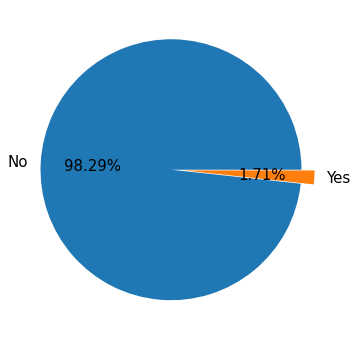

In [17]:
# 观察是否存在类别不平衡现象
p = feature['bad_good'].value_counts()    # 目标变量正负样本的分布

plt.figure(figsize=(10,6))    # 构建图像

# 绘制饼图并调整字体大小
patches, l_text, p_text = plt.pie(p,labels=['No','Yes'],autopct='%1.2f%%',explode=(0,0.1))
# l_text是饼图对着文字大小，p_text是饼图内文字大小
for t in p_text:
    t.set_size(15)
for t in l_text:
    t.set_size(15)
    
plt.show()    # 展示图像

In [18]:
good_grouped1=feature.groupby('bad_good')['CUST_ID'].count()
good_grouped1

bad_good
0    280401
1      4884
Name: CUST_ID, dtype: int64

In [19]:
# 每个正样本用SMOTE方法随机生成两个新的样本
posDf = feature[feature['bad_good'] == 1].drop(['bad_good'], axis=1)    
posArray = posDf.values    # pd.DataFrame -> np.array, 以满足SMOTE方法的输入要求
newPosArray = Smote(posArray, 2, 5).over_sampling()
newPosDf = pd.DataFrame(newPosArray)    # np.array -> pd.DataFrame

newPosDf.head(10)    # 观察此时的新样本

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399,400,401,402,403,404,405,406,407,408,409,410,411,412,413,414,415,416,417,418,419,420,421,422,423,424,425,426,427,428,429,430,431,432,433,434,435,436,437,438,439,440,441,442,443,444,445,446,447,448,449,450,451,452,453,454,455,456,457,458,459,460,461,462,463,464,465,466,467,468,469,470,471,472,473,474,475,476,477,478,479,480,481,482,483,484,485,486,487,488,489,490,491,492,493,494,495,496,497,498,499,500,501,502,503,504,505,506,507,508,509,510,511,512,513,514,515,516,517,518,519,520,521,522,523,524,525,526,527,528,529,530,531,532,533,534,535,536,537,538,539,540,541,542,543,544,545,546,547,548,549,550,551,552,553,554,555,556,557,558,559,560,561,562,563,564,565,566,567,568,569,570,571,572,573,574,575,576,577,578,579,580,581,582,583,584,585,586,587,588,589,590,591,592,593,594,595,596,597,598,599,600,601,602,603,604,605,606,607,608,609,610,611,612,613,614,615,616,617,618,619,620,621,622,623,624,625,626,627,628,629,630,631,632,633,634,635,636,637,638,639,640,641,642,643,644,645,646,647,648,649,650,651,652,653,654,655,656,657,658,659,660,661,662,663,664,665,666,667,668,669,670
0,0.013058,0.0,0.003351,0.003351,0.0,0.000393,0.001512,0.000436,0.001262,0.000387,0.002176,0.000426,0.002427,0.008574,0.167571,0.000257,0.0,0.0,0.000426,0.0,0.0,4.783637e-07,0.000348,0.000348,0.0,0.0,0.004596,0.002373,0.000469,0.000638,0.000204,0.000351,0.000297,0.000263,0.0,0.0,0.000455,0.000505,0.0,0.0,0.0,0.0,0.000053,0.0001,0.0,0.0,0.000469,0.000638,0.0,0.0,0.0,0.000052,0.000000,9.698955e-07,0.0,0.000362,0.000000,0.000014,0.0,0.000049,0.000000,0.000001,0.0,0.000164,0.000000,0.000023,0.000000,0.000032,0.000000,0.000003,0.0,0.000196,0.000000,0.000009,0.600691,0.308586,0.436657,0.007120,0.007120,0.007120,0.0,0.0,0.0,0.004788,0.007120,0.0,8.925149e-05,8.298684e-05,0.578314,0.000053,0.000862,0.578314,0.600837,0.495581,0.538232,0.701838,0.41028,0.000103,0.000091,0.0,0.0,0.0,0.0,0.000233,0.000234,0.000262,0.000269,0.0,0.0,0.0,0.0,0.000697,0.000936,0.000598,0.000598,0.000627,0.000936,0.000285,0.000768,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000463,0.000102,4.620943e-04,0.002552,0.000409,0.000120,4.090253e-04,0.001487,0.000592,0.000037,5.917559e-04,0.001165,0.000070,0.000084,0.000086,0.000176,0.000634,0.0,0.0,0.000064,0.000555,0.0,0.0,0.0,0.000972,0.0,0.000504,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0

In [20]:
# 调整为正样本在数据集中应有的格式
newPosDf.columns = posDf.columns    # 还原特征名
cateCols = list(newPosDf.columns.drop(['CUST_ACCOUNT_CNT', 'CUST_PRODUCT_CNT','CUST_SAVING_AMT','CUST_SAVING_AMT','OS_PRCP_SUM_THREE','OS_PRCP_SUM_SIX',
                                     'L3_DR_AMT','L3_DR_CNT','CUST_DOLLER_FLAG_N' ,'CUST_DOLLER_FLAG_Y','CUST_INTERNATIONAL_GOLD_FLAG_N','CUST_INTERNATIONAL_GOLD_FLAG_Y','CUST_INTERNATIONAL_DIAMOND_FLAG_N','CUST_INTERNATIONAL_DIAMOND_FLAG_Y',
                                      'CUST_GOLD_COMMON_FLAG_N','CUST_GOLD_COMMON_FLAG_Y','CUST_STAD_PLATINUM_FLAG_N','CHANNEL_MOB_STAIN_CNT','CHANNEL_MOB_SOUTTA_CNT',
                                      'L3_CHANNEL_MOB_DOUTTA_AVGAMT','L3_CHANNEL_MOB_SOUTTA_AVGAMT','L3_CHANNEL_MOB_DOUTTA_AVGCNT','L6_CHANNEL_MOB_DOUTTA_AVGCNT','L6_CHANNEL_MOB_SOUTTA_AVGAMT','L6_CHANNEL_MOB_DOUTTA_AVGAMT','CHANNEL_AUTO_DOUTTA_AMT',
                                      'CHANNEL_AUTO_DOUTTA_AMT','L3_CHANNEL_AUTO_DOUTTA_AVGCNT','L6_CHANNEL_AUTO_DOUTTA_AVGCNT']))   # 提取离散特征名组成的列表
for i in cateCols:
    newPosDf[i] = newPosDf[i].apply(lambda x: 1 if x >= 0.5 else 0)    # 将特征值变回0、1二元数值
newPosDf['bad_good'] = 1    # 添加目标变量列

newPosDf.head(10)    # 观察此时的新样本

,LAST_OPEN_TENURE_DAYS,G_OS_PRCP_SUM,OS_PRCP_SUM_THREE,OS_PRCP_SUM_SIX,guozhai_flag,L3_DR_AMT,L3_DR_CNT,DR_AMT,DR_CNT,L3_CR_AMT,L3_CR_CNT,CR_AMT,CR_CNT,CUST_ACCOUNT_CNT,CUST_PRODUCT_CNT,CUST_SAVING_AMT,CUST_FINA_AMT,CUST_PRIFINA_AMT,CUST_FOND_AMT,CUST_NADEBT_AMT,CUST_YBT_AMT,CUST_METAL_AMT,CUST_AUM,CUST_ASSET_AMT,CUST_DEBT_AMT,CUST_TENURE_MONTHS,CUST_ACCOUNT_OPEN_CNT,CUST_ACCOUNT_LOST_CNT,L3_CUST_AVG_AUM,L6_CUST_AVG_AUM,L3_CUST_SAVING_AVGAMT,L6_CUST_SAVING_AVGAMT,L3_CUST_FINA_AVGAMT,L6_CUST_FINA_AVGAMT,L3_CUST_PRIFINA_AVGAMT,L6_CUST_PRIFINA_AVGAMT,L3_CUST_FOND_AVGAMT,L6_CUST_FOND_AVGAMT,L3_CUST_NADEBT_AVGAMT,L6_CUST_NADEBT_AVGAMT,L3_CUST_YBT_AVGAMT,L6_CUST_YBT_AVGAMT,L3_CUST_METAL_AVGAMT,L6_CUST_METAL_AVGAMT,L3_CUST_PRIDEPT_AVGAMT,L6_CUST_PRIDEPT_AVGAMT,L3_CUST_ASSET_AVG_AMT,L6_CUST_ASSET_AVG_AMT,L3_CUST_DEBT_AVG_AMT,L6_CUST_DEBT_AVG_AMT,CUST_SAME_IN_AMT,CUST_DIFF_IN_AMT,CUST_SAME_OUT_AMT,CUST_DIFF_OUT_AMT,CUST_SAME_IN_CNT,CUST_DIFF_IN_CNT,CUST_SAME_OUT_CNT,CUST_DIFF_OUT_CNT,L3_CUST_SAME_IN_AMT,L3_CUST_DIFF_IN_AMT,L3_CUST_SAME_OUT_AMT,L3_CUST_DIFF_OUT_AMT,L3_CUST_SAME_IN_CNT,L3_CUST_DIFF_IN_CNT,L3_CUST_SAME_OUT_CNT,L3_CUST_DIFF_OUT_CNT,L6_CUST_SAME_IN_AMT,L6_CUST_DIFF_IN_AMT,L6_CUST_SAME_OUT_AMT,L6_CUST_DIFF_OUT_AMT,L6_CUST_SAME_IN_CNT,L6_CUST_DIFF_IN_CNT,L6_CUST_SAME_OUT_CNT,L6_CUST_DIFF_OUT_CNT,DEP_SA_OPEN_TENURE_DAYS,DEP_SA_LAST_TENURE_DAYS,DEP_SA_AVG_TENURE_DAYS,DEP_SA_SUMACCOUNT_CNT,L3_DEP_SA_AVG_ACCOUNT_CNT,L6_DEP_SA_AVG_ACCOUNT_CNT,DEP_SA_NEW_ACCOUNT_CNT,L3_DEP_SA_NEW_ACCOUNT_CNT,L6_DEP_SA_NEW_ACCOUNT_CNT,DEP_SA_FGCR_ACCOUNT_CNT,DEP_SA_ACCOUNT_CNT,DEP_SA_FGCR_BAL,L3_DEP_SA_FGCR_BAL,L6_DEP_SA_FGCR_BAL,DEP_SA_BAL,L3_DEP_SA_BAL,L6_DEP_SA_BAL,DEP_SA_NEW_BAL,L3_DEP_SA_NEW_AVG_BAL,L6_DEP_SA_NEW_AVG_BAL,DEP_SA_FGCR_NEW_BAL,L3_DEP_SA_FGCR_NEW_AVG_BAL,L6_DEP_SA_FGCR_NEW_AVG_BAL,DEP_SA_TRSP_DEP_AMT,DEP_SA_TRSP_WITD_AMT,DEP_SA_FGCR_TRSP_DEP_AMT,DEP_SA_FGCR_TRSP_WITD_AMT,DEP_SA_FIXTCUR_AMT,DEP_SA_FGCR_FIXTCUR_AMT,DEP_SA_DAY_MAX_IN_AMT,DEP_SA_MOTH_MAX_IN_AMT,DEP_SA_DAY_MAX_OUT_AMT,DEP_SA_MOTH_MAX_OUT_AMT,DEP_SA_FGCR_DAY_MAX_IN_AMT,DEP_SA_FGCR_MOTH_MAX_IN_AMT,DEP_SA_FGCR_DAY_MAX_OUT_AMT,DEP_SA_FGCR_MOTH_MAX_OUT_AMT,L3DEP_SA_DAY_MAX_IN_AMT,L3DEP_SA_MOTH_MAX_IN_AMT,L3DEP_SA_DAY_MAX_OUT_AMT,L3DEP_SA_MOTH_MAX_OUT_AMT,L6DEP_SA_DAY_MAX_IN_AMT,L6DEP_SA_MOTH_MAX_IN_AMT,L6DEP_SA_DAY_MAX_OUT_AMT,L6DEP_SA_MOTH_MAX_OUT_AMT,L3DEP_SA_FGCR_DAY_MAX_IN_AMT,L3DEP_SA_FGCR_MOTH_MAX_IN_AMT,L3DEP_SA_FGCR_DAY_MAX_OUT_AMT,L3DEP_SA_FGCR_MOTH_MAX_OUT_AMT,L6DEP_SA_FGCR_DAY_MAX_IN_AMT,L6DEP_SA_FGCR_MOTH_MAX_IN_AMT,L6DEP_SA_FGCR_DAY_MAX_OUT_AMT,L6DEP_SA_FGCR_MOTH_MAX_OUT_AMT,DEP_SA_DEPCD_COSM_AMT,DEP_SA_DEPCD_COSM_CNT,L3DEP_SA_DEPCD_COSM_AVG_AMT,L3DEP_SA_DEPCD_COSM_AVG_CNT,L6DEP_SA_DEPCD_COSM_AVG_AMT,L6DEP_SA_DEPCD_COSM_AVG_CNT,DEP_SA_DEBIT_AMT,DEP_SA_DEBIT_CNT,DEP_SA_CREDIT_AMT,DEP_SA_CREDIT_CNT,L3DEP_SA_DEBIT_AMT,L3DEP_SA_DEBIT_CNT,L3DEP_SA_CREDIT_AMT,L3DEP_SA_CREDIT_CNT,L6DEP_SA_DEBIT_AMT,L6DEP_SA_DEBIT_CNT,L6DEP_SA_CREDIT_AMT,L6DEP_SA_CREDIT_CNT,DEP_SA_DAYAVG_BAL,L3_DEP_SA_DAYAVG_BAL,L6_DEP_SA_DAYAVG_BAL,L3_DEP_CARD_CUST_AMT,L3_DEP_CARD_CUST_CNT,L3_DEP_CARD_CASH_AMT,L3_DEP_CARD_CASH_CNT,L6_DEP_CARD_CUST_AMT,L6_DEP_CARD_CUST_CNT,L6_DEP_CARD_CASH_AMT,L6_DEP_CARD_CASH_CNT,DEP_CARD_CASH_CNT,DEP_CARD_CUST_CNT,DEP_CARD_CASH_AMT,DEP_CARD_CUST_AMT,CHANNEL_CTR_FUND_AMT,CHANNEL_CTR_FUND_CNT,CHANNEL_CTR_FINANCIAL_AMT,CHANNEL_CTR_FINANCIAL_CNT,CHANNEL_CTR_INSURE_AMT,CHANNEL_CTR_INSURE_CNT,CHANNEL_CTR_GLOAN_AMT,CHANNEL_CTR_GLOAN_CNT,L3_CHANNEL_CTR_FUND_MONTHAVG_AMT,L3_CHANNEL_CTR_FUND_MONTHAVG_CNT,L3_CHANNEL_CTR_FINANCIAL_MONTHAV,L3_CHANNEL_CTR_FINANCIAL_MONTHA0,L3_CHANNEL_CTR_INSURE_MONTHAVG_A,L3_CHANNEL_CTR_INSURE_MONTHAVG_C,L3_CHANNEL_CTR_GLOAN_MONTHAVG_AM,L3_CHANNEL_CTR_GLOAN_MONTHAVG_CN,L6_CHANNEL_CTR_FUND_MONTHAVG_AMT,L6_CHANNEL_CTR_FUND_MONTHAVG_CNT,L6_CHANNEL_CTR_FINANCIAL_MONTHAV,L6_CHANNEL_CTR_FINANCIAL_MONTHA0,L6_CHANNEL_CTR_INSURE_MONTHAVG_A,L6_CHANNEL_CTR_INSURE_MONTHAVG_C,L6_CHANNEL_CTR_GLOAN_MONTHAVG_AM,L6_CHANNEL_CTR_GLOAN_MONTHAVG_CN,CHANNEL_WEBBANK_FUND

In [21]:
print("原本的正样本有%d条" % posDf.shape[0])
print("原本的负样本有%d条" % (feature.shape[0] - posDf.shape[0]))

原本的正样本有4884条
原本的负样本有280401条


In [22]:
print("原本的正样本有%d条" % posDf.shape[0])
print("原本的负样本有%d条" % (feature.shape[0] - posDf.shape[0]))

原本的正样本有4884条
原本的负样本有280401条


In [47]:
#构建类别平衡的数据集
from sklearn.utils import shuffle    

newPosDf = newPosDf[:275517]    
feature = pd.concat([feature, newPosDf])    # 竖向拼接
# data = shuffle(data).reset_index(drop=True)

print("此时数据集的规模为：", feature.shape)

此时数据集的规模为： (6810, 672)


In [43]:
#构建类别平衡的数据集
from sklearn.utils import shuffle    
#
feature= feature[:200]    # 直接选取前3305条样本
feature = pd.concat([feature, newPosDf])    # 竖向拼接
# data = shuffle(data).reset_index(drop=True)

print("此时数据集的规模为：", feature.shape)

此时数据集的规模为： (3505, 672)


In [48]:
# K折交叉验证代码
# from sklearn.cross_validation import KFold
from sklearn.model_selection import KFold

def kFold_cv(X, y, classifier, **kwargs):
    """
    :param X: 特征
    :param y: 目标变量
    :param classifier: 分类器
    :param **kwargs: 参数
    :return: 预测结果
    """
    kf = KFold(n_splits=5, shuffle=True) 
    y_pred = np.zeros(len(y))    # 初始化y_pred数组
    
    for train_index, test_index in kf.split(X):  
        X_train = X[train_index]    
        X_test = X[test_index]
        y_train = y[train_index]    # 划分数据集
        clf = classifier(**kwargs)    
        clf.fit(X_train, y_train)    # 模型训练
        y_pred[test_index] = clf.predict(X_test)    # 模型预测
    
    return y_pred  

In [49]:
# 模型预测
from sklearn.linear_model import LogisticRegression as LR    # 逻辑回归
from sklearn.svm import SVC    # SVM
from sklearn.ensemble import RandomForestClassifier as RF    # 随机森林
from sklearn.ensemble import AdaBoostClassifier as Adaboost    # AdaBoost
from xgboost import XGBClassifier as XGB    # XGBoost

# X = data.iloc[:, :-1].as_matrix()
X = feature.iloc[:, :-1].iloc[:,:].values # Kagging
y = feature.iloc[:, -1].values

from sklearn.utils import shuffle
 
X_shuffle, y_shuffle = shuffle(X, y)

# 此处仅做演示，因此未进行调参过程
lr_pred = kFold_cv(X, y, LR)
svc_pred = kFold_cv(X, y, SVC)
rf_pred = kFold_cv(X, y, RF)
ada_pred = kFold_cv(X, y, Adaboost)
xgb_pred = kFold_cv(X, y, XGB)

ValueError: This solver needs samples of at least 2 classes in the data, but the data contains only one class: 1